In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
df=pd.read_csv("/Users/myspecialonebrigitta/Desktop/data_center.csv")
df['Time'] = pd.to_datetime(df['Time']) 
df['date'] = df['Time'].dt.date      
df['Time'] = df['Time'].dt.time     
pivot_df = df.pivot(index='date', columns='Time', values='Load')
#this saves the pivot_df Dataframe to a 
#CSV file on my computer with the name daily_load_matrix
pivot_df.to_csv("daily_load_matrix.csv")

In [45]:
pivot_df = pivot_df.dropna() 
pivot_df.shape     
pivot_df.head() 

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,102.0,102.0,102.0,102.0,102.0,102.0,100.0,100.0,100.0,100.0,...,100.0,102.0,100.0,100.0,102.0,100.0,100.0,100.0,100.0,102.0
2011-01-02,100.0,100.0,102.0,102.0,102.0,100.0,100.0,102.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,102.0,100.0,102.0,100.0
2011-01-03,100.0,102.0,100.0,102.0,102.0,100.0,100.0,100.0,102.0,100.0,...,100.0,102.0,100.0,102.0,100.0,102.0,100.0,100.0,100.0,100.0
2011-01-04,100.0,100.0,102.0,102.0,102.0,100.0,102.0,100.0,100.0,102.0,...,100.0,100.0,100.0,100.0,100.0,98.0,100.0,98.0,100.0,100.0
2011-01-05,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,102.0,98.0,100.0


In [46]:
# Drop any non-numeric columns, like 'cluster' or 'label'
X = pivot_df.select_dtypes(include='number')  # only keeps numeric columns

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=3, random_state=42)
pivot_df['cluster'] = kmeans.fit_predict(X_scaled)

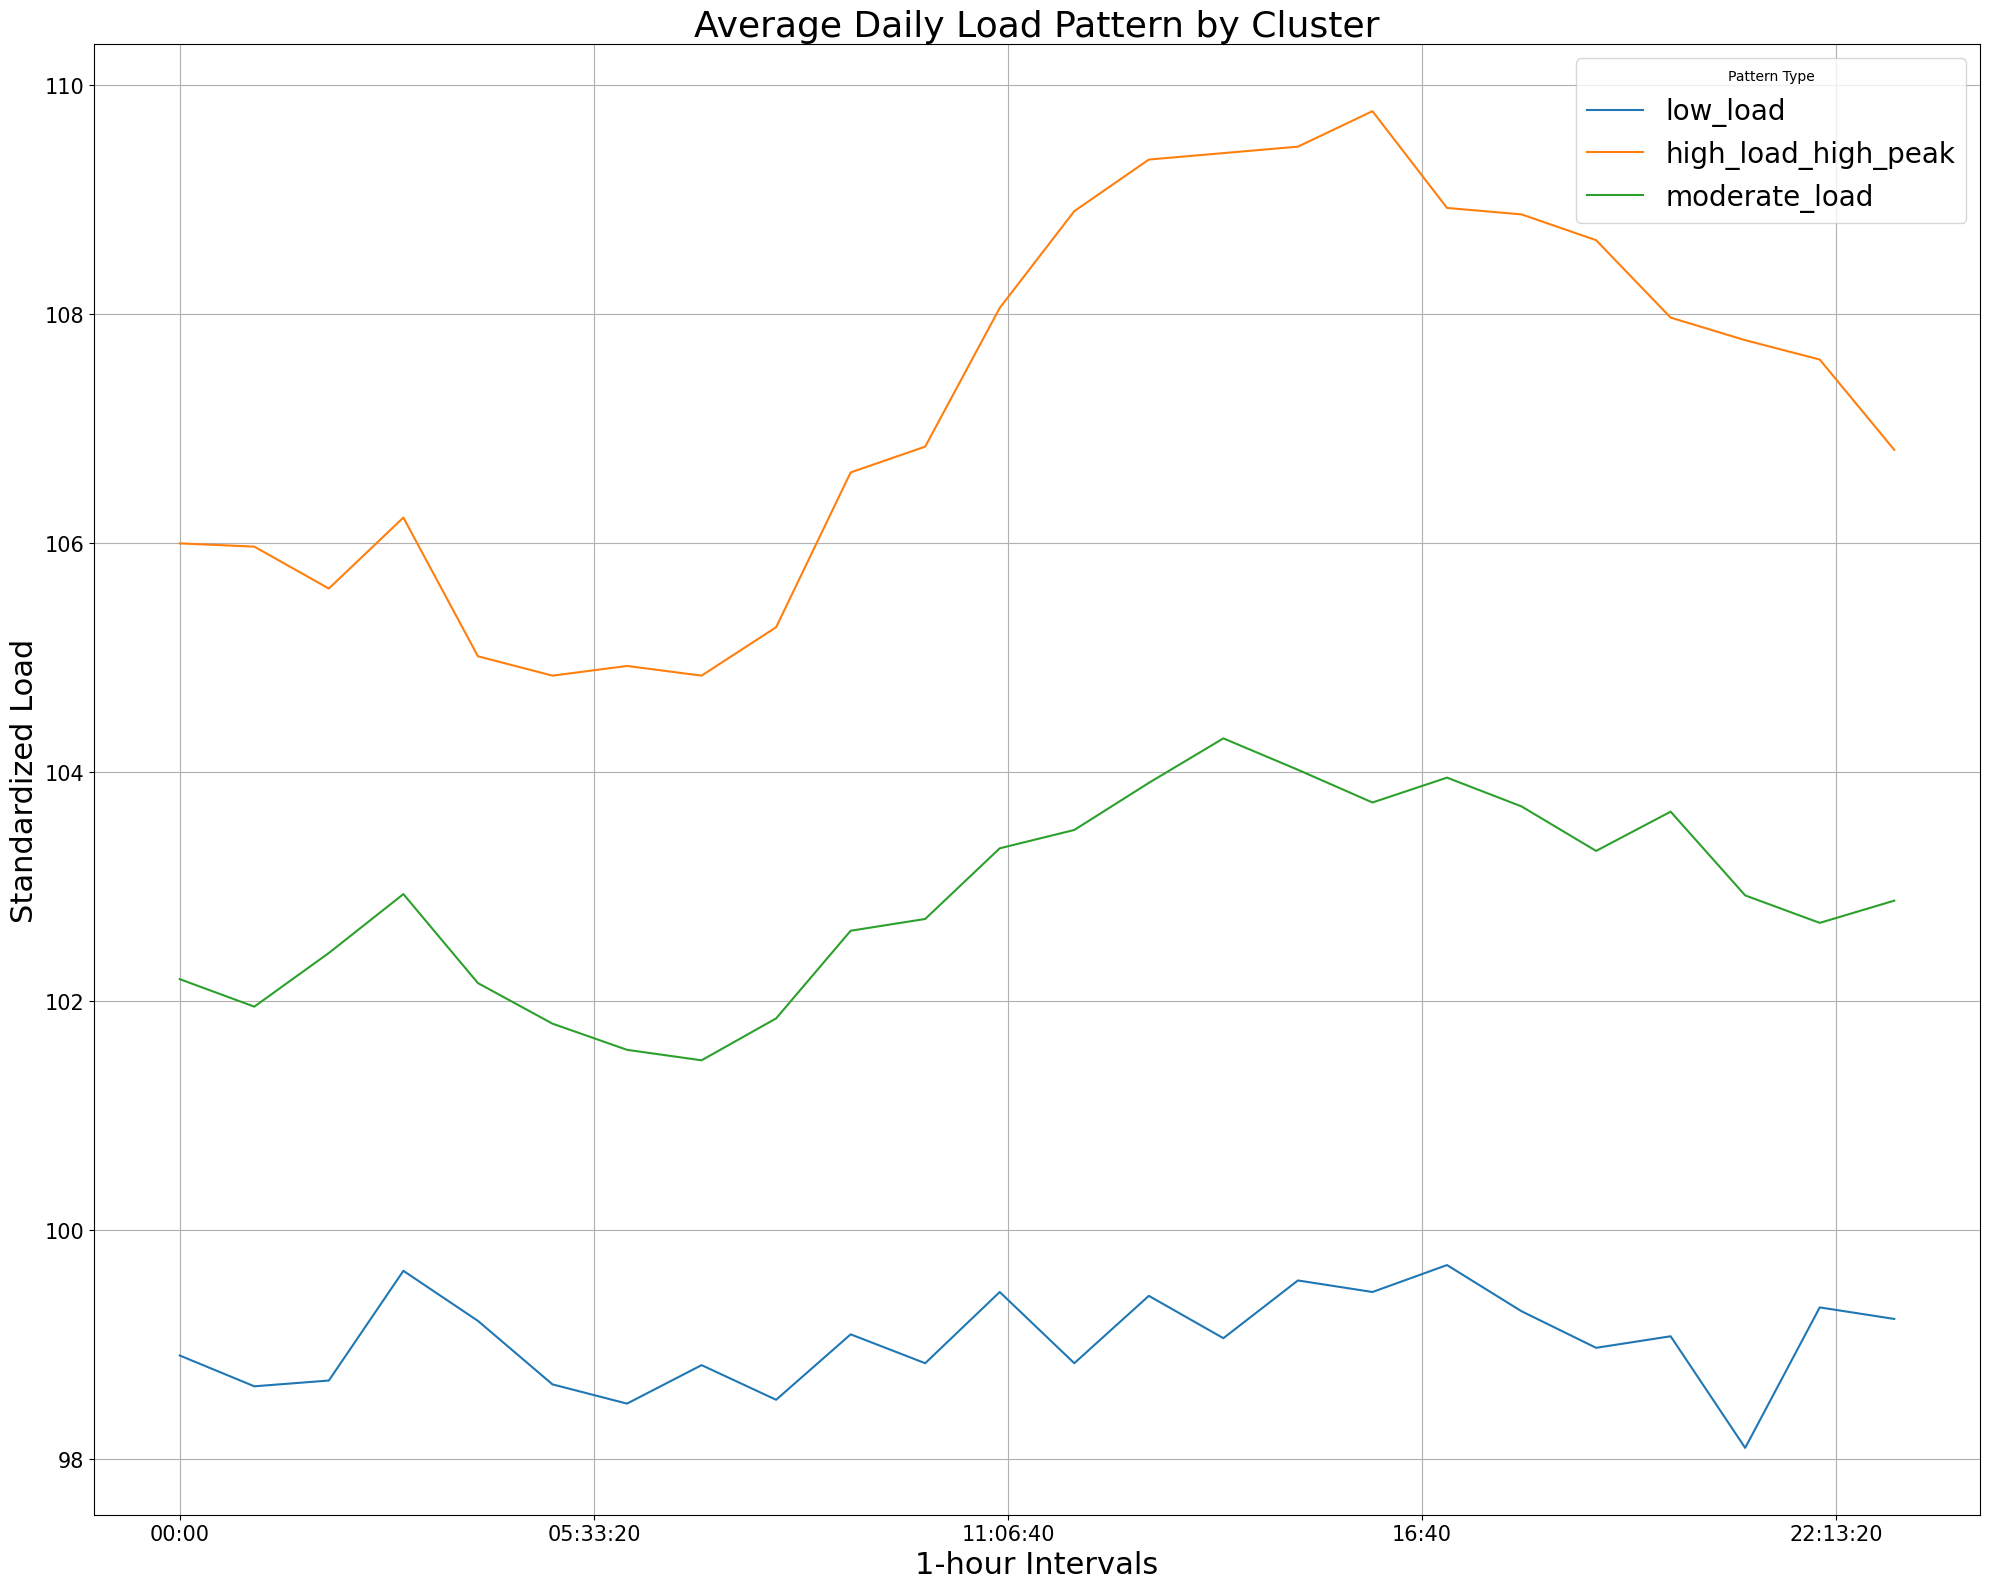

In [48]:
load_columns = pivot_df.columns[:24]

assert 'cluster' in pivot_df.columns, "Missing 'cluster' column. Run KMeans first."
avg_by_label = pivot_df.groupby("cluster")[load_columns].mean()
# Define custom labels
cluster_name_map = {
    0: "low_load",
    1: "high_load_high_peak",
    2: "moderate_load"
}

# Rename cluster index to meaningful names
avg_by_label.index = avg_by_label.index.map(cluster_name_map)
#transposes the table so that X-axis=time of day, Y-axis=average load
avg_by_label.T.plot(figsize=(20, 16))
plt.title("Average Daily Load Pattern by Cluster", fontsize=26)
plt.xlabel("1-hour Intervals",fontsize=22)
plt.ylabel("Standardized Load",fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title="Pattern Type",fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
for c in sorted(pivot_df['cluster'].unique()):
    print(f"\nCluster {c}:")
    print(pivot_df[pivot_df['cluster'] == c].index.tolist()[:10]) 


Cluster 0:
[0, 1, 2, 3, 4, 18, 22, 133, 134, 135]

Cluster 1:
[74, 91, 98, 107, 108, 109, 110, 111, 112, 113]

Cluster 2:
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [89]:
print(pivot_df.columns.tolist())

['date', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', 'cluster', 'season', 'pattern']


In [90]:
pivot_df.to_csv("daily_load_with_clusters_and_labels.csv")

In [91]:
pivot_df = pivot_df.reset_index()
pivot_df['date'] = pd.to_datetime(pivot_df['date'])  # ensure it's datetime
pivot_df['season'] = pivot_df['date'].apply(get_season)

In [92]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

pivot_df['season'] = pivot_df['date'].apply(get_season)

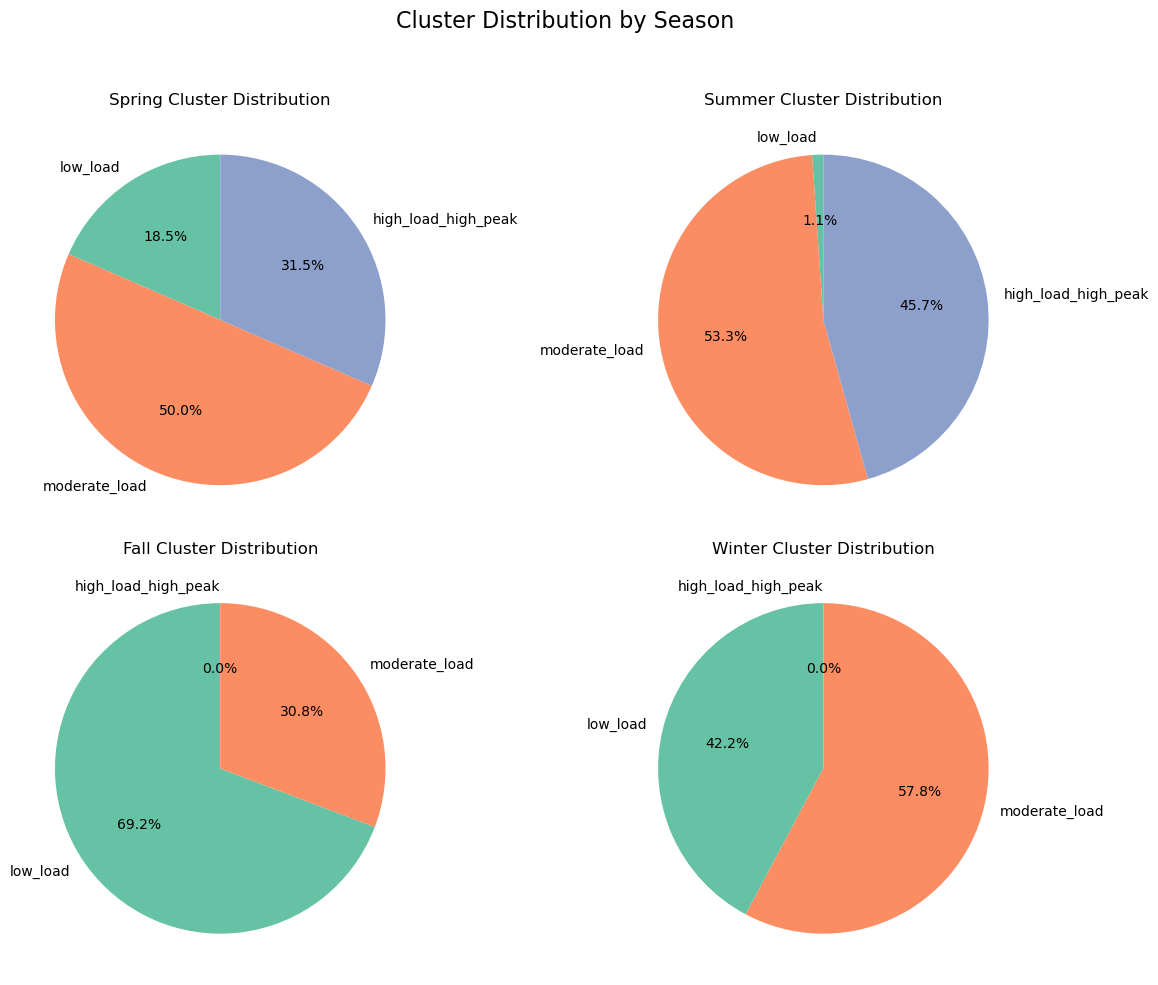

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Define function to assign seasons ---
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# --- 2. Ensure datetime and assign season ---
df['date'] = pd.to_datetime(df['date'])
df['season'] = df['date'].dt.month.apply(assign_season)

# --- 3. Map clusters to descriptive labels ---
cluster_label_map = {
    0: "low_load",
    1: "high_load_high_peak",
    2: "moderate_load"
}
df['cluster_label'] = df['cluster'].map(cluster_label_map)

# --- 4. Define label order and custom colors (consistent across all charts) ---
label_order = ['low_load', 'moderate_load', 'high_load_high_peak']
color_map = {
    'low_load': '#66c2a5',             # greenish
    'moderate_load': '#fc8d62',        # orange
    'high_load_high_peak': '#8da0cb'   # bluish
}
label_colors = [color_map[label] for label in label_order]

# --- 5. Plotting setup ---
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# --- 6. Plot one pie chart per season with fixed label and color order ---
for i, season in enumerate(seasons):
    season_data = df[df['season'] == season]
    cluster_counts = season_data['cluster_label'].value_counts().reindex(label_order, fill_value=0)
    
    axes[i].pie(
        cluster_counts,
        labels=cluster_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=label_colors
    )
    axes[i].set_title(f'{season} Cluster Distribution')

# --- 7. Final formatting ---
plt.suptitle('Cluster Distribution by Season', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [73]:
load_columns = [col for col in pivot_df.columns if col not in ['Unnamed: 0', 'date', 'cluster', 'pattern', 'season']]

features_df = pd.DataFrame(index=pivot_df.index)

# total load（kWh）
features_df["total_load"] = pivot_df[load_columns].sum(axis=1)

# peak and valley
features_df["peak_load"] = pivot_df[load_columns].max(axis=1)
features_df["valley_load"] = pivot_df[load_columns].min(axis=1)
features_df["load_range"] = features_df["peak_load"] - features_df["valley_load"]

# standard deviation of load profile
features_df["load_std"] = pivot_df[load_columns].std(axis=1)



In [75]:
load_columns = [col for col in pivot_df.columns if col not in ['Unnamed: 0', 'date', 'cluster', 'pattern', 'season']]
features_df["time_of_peak"] = pivot_df[load_columns].idxmax(axis=1).astype(str)
features_df["time_of_valley"] = pivot_df[load_columns].idxmin(axis=1).astype(str)


In [76]:
features_df.index = pd.to_datetime(features_df.index)
features_df["day_of_week"] = features_df.index.dayofweek  # 0=Monday
features_df["is_weekend"] = features_df["day_of_week"] >= 5


In [77]:
features_df.head()  

,total_load,peak_load,valley_load,load_range,load_std,time_of_peak,time_of_valley,day_of_week,is_weekend
1970-01-01 00:00:00.000000000,2418.0,102.0,100.0,2.0,0.989071,00:00:00,06:00:00,3,False
1970-01-01 00:00:00.000000001,2416.0,102.0,100.0,2.0,0.963087,02:00:00,00:00:00,3,False
1970-01-01 00:00:00.000000002,2420.0,102.0,100.0,2.0,1.007220,01:00:00,00:00:00,3,False
1970-01-01 00:00:00.000000003,2412.0,102.0,98.0,4.0,1.215838,02:00:00,19:00:00,3,False
1970-01-01 00:00:00.000000004,2396.0,102.0,98.0,4.0,0.816497,21:00:00,06:00:00,3,False


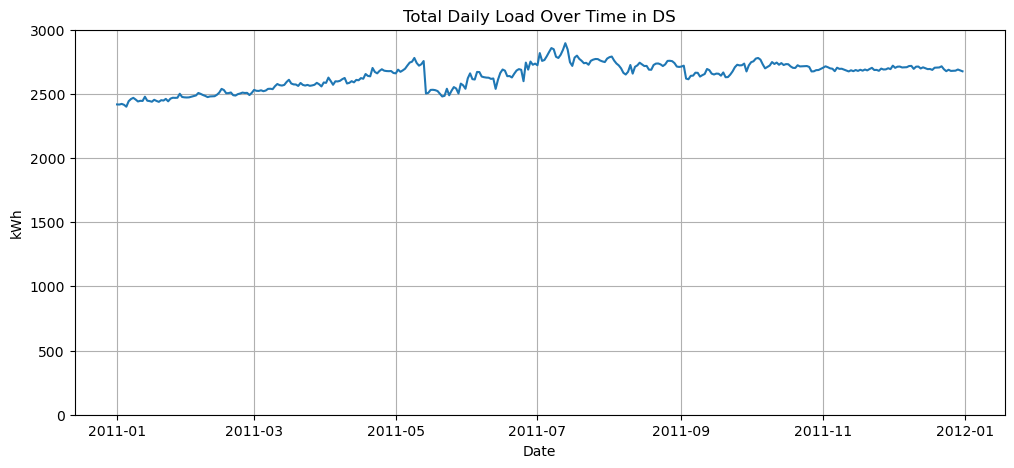

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# 0. 读入数据
df = pd.read_csv("daily_load_with_clusters_and_labels.csv")

# ✅ 确保你有 'date' 和 'cluster' 列
df['date'] = pd.to_datetime(df['date'])

# ✅ 定义 pivot_df（不要跳过这步！）
pivot_df = df.copy()

# 1. 映射 pattern 和 season
pivot_df['pattern'] = pivot_df['cluster'].map(cluster_name_map)
pivot_df['season'] = pivot_df['date'].apply(get_season)

# 2. 列名转为字符串（以免是 datetime.time）
pivot_df.columns = pivot_df.columns.map(str)

# 3. 提取负载列（非 date/cluster/pattern/season）
load_columns = [col for col in pivot_df.columns if col not in ['date', 'cluster', 'pattern', 'season']]

# 4. 提取特征
features_df = pd.DataFrame(index=pivot_df.index)
features_df["total_load"] = pivot_df[load_columns].sum(axis=1)
features_df["peak_load"] = pivot_df[load_columns].max(axis=1)
features_df["valley_load"] = pivot_df[load_columns].min(axis=1)
features_df["load_range"] = features_df["peak_load"] - features_df["valley_load"]
features_df["load_std"] = pivot_df[load_columns].std(axis=1)
features_df["time_of_peak"] = pivot_df[load_columns].idxmax(axis=1)
features_df["time_of_valley"] = pivot_df[load_columns].idxmin(axis=1)

# 5. 取出纯时间部分
features_df["time_of_peak"] = features_df["time_of_peak"].str[-8:]
features_df["time_of_valley"] = features_df["time_of_valley"].str[-8:]

# ✅ 修复 plot，x 轴用日期
plt.figure(figsize=(12, 5))
plt.plot(pivot_df['date'], features_df["total_load"])
plt.title("Total Daily Load Over Time in DS")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.ylim(0,3000)
plt.grid(True)
plt.show()


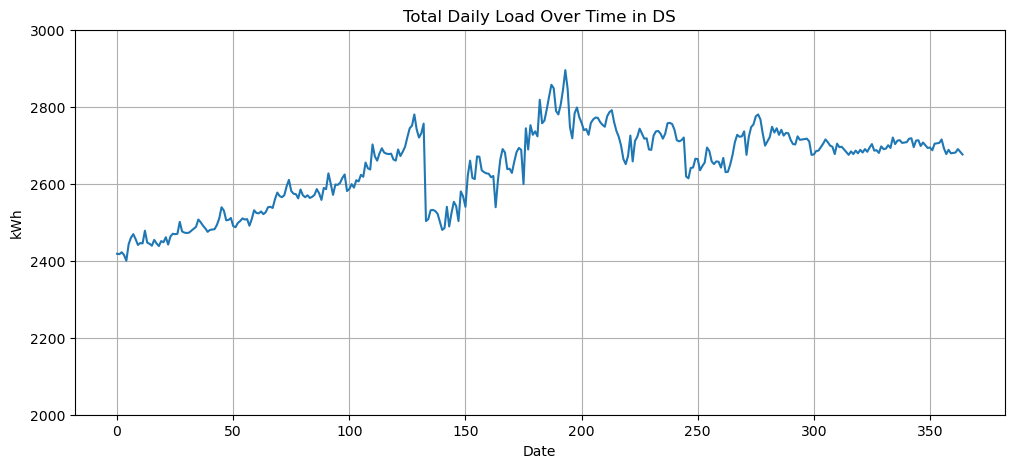

In [106]:
import matplotlib.pyplot as plt

features_df["total_load"].plot(figsize=(12, 5), title="Total Daily Load Over Time in DS")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.ylim(2000,3000)
plt.grid(True)
plt.show()

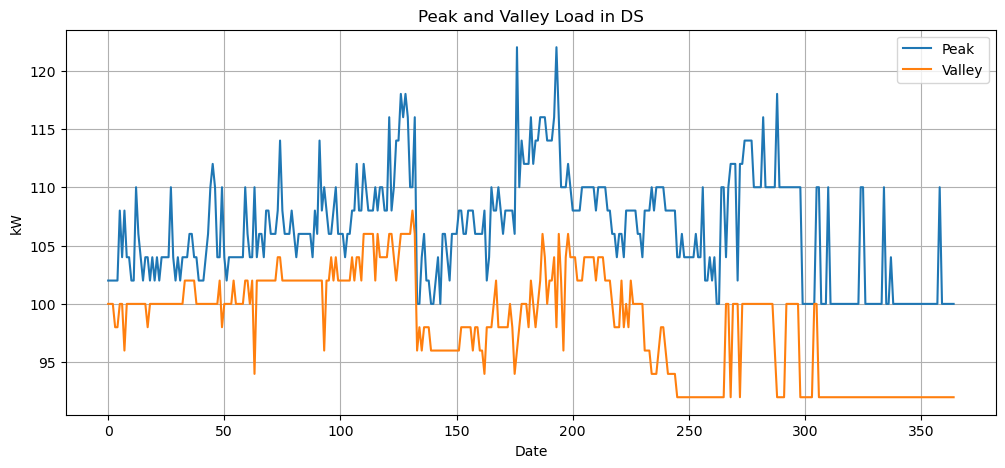

In [95]:
features_df[["peak_load", "valley_load"]].plot(figsize=(12, 5), title="Peak and Valley Load in DS")
plt.xlabel("Date")
plt.ylabel("kW")
plt.legend(["Peak", "Valley"])
plt.grid(True)
plt.show()

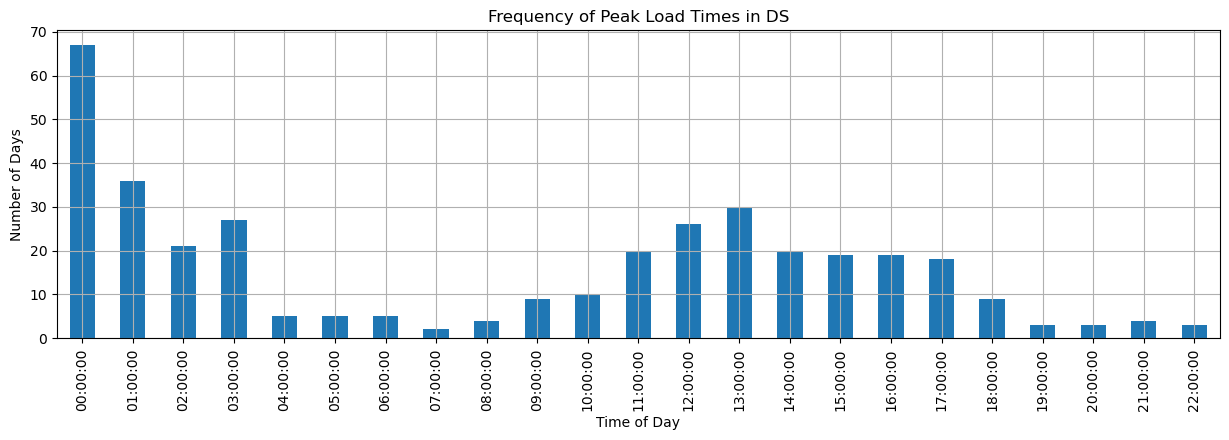

In [96]:
# Plot histogram of time_of_peak
features_df["time_of_peak"].value_counts().sort_index().plot(kind="bar", figsize=(15, 4), title="Frequency of Peak Load Times in DS")
plt.xlabel("Time of Day")
plt.ylabel("Number of Days")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [97]:
features_df["is_weekend_str"] = features_df["is_weekend"].map({True: "Weekend", False: "Weekday"})
sns.boxplot(x="is_weekend_str", y="total_load", data=features_df)
plt.title("Total Load(VHS): Weekday vs Weekend")
plt.ylabel("kWh")
plt.show()

KeyError: 'is_weekend'

In [104]:
pivot_df.columns = [str(col) for col in pivot_df.columns]  # Ensure all columns are string-type time labels
feature_df = pd.DataFrame(index=pivot_df.index)

feature_df['peak_load'] = pivot_df.max(axis=1)
feature_df['valley_load'] = pivot_df.min(axis=1)
feature_df['load_range'] = feature_df['peak_load'] - feature_df['valley_load']
feature_df['mean_load'] = pivot_df.mean(axis=1)
feature_df['std_load'] = pivot_df.std(axis=1)
feature_df['load_factor'] = feature_df['mean_load'] / feature_df['peak_load']
feature_df['peak_time'] = pivot_df.idxmax(axis=1)
feature_df['valley_time'] = pivot_df.idxmin(axis=1)
plt.figure(figsize=(16, 10))
feature_df[['peak_load', 'valley_load', 'load_range', 'mean_load', 'std_load']].hist(bins=30, figsize=(16, 10))
plt.suptitle("Histograms of Load Features", fontsize=20)
plt.tight_layout()
plt.show()

TypeError: '>=' not supported between instances of 'int' and 'Timestamp'

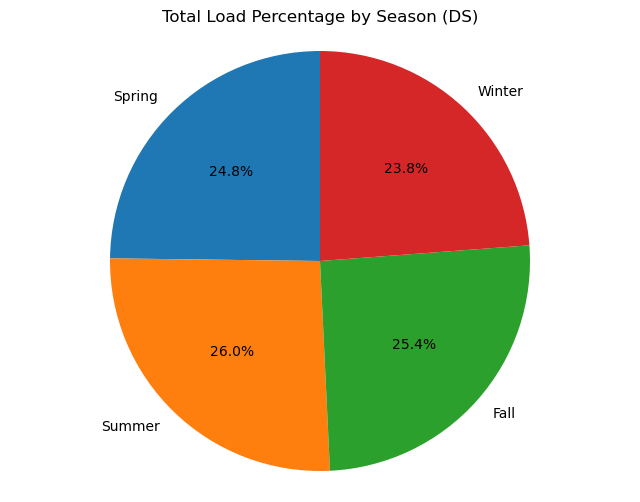

In [105]:
# Define hourly columns (assuming 24 hourly load columns, or more)
hourly_columns = [col for col in pivot_df.columns if col not in ['date', 'season', 'pattern', 'cluster']]

# Calculate total load per day (sum across hours)
pivot_df['total_load'] = pivot_df[hourly_columns].sum(axis=1)

# Group by season
season_total = pivot_df.groupby('season')['total_load'].sum()

# Optional: reorder to logical season sequence
season_total = season_total[['Spring', 'Summer', 'Fall', 'Winter']]  # Skip if missing any

# Plot
plt.figure(figsize=(8, 6))
plt.pie(season_total, labels=season_total.index, autopct='%1.1f%%', startangle=90)
plt.title("Total Load Percentage by Season (DS)")
plt.axis('equal')
plt.show()
